# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
dataframe = pd.read_csv('data/comprar_alquilar.csv')
dataframe.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
dataframe.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada varaible, diferenciando por colores el target (*comprar*).

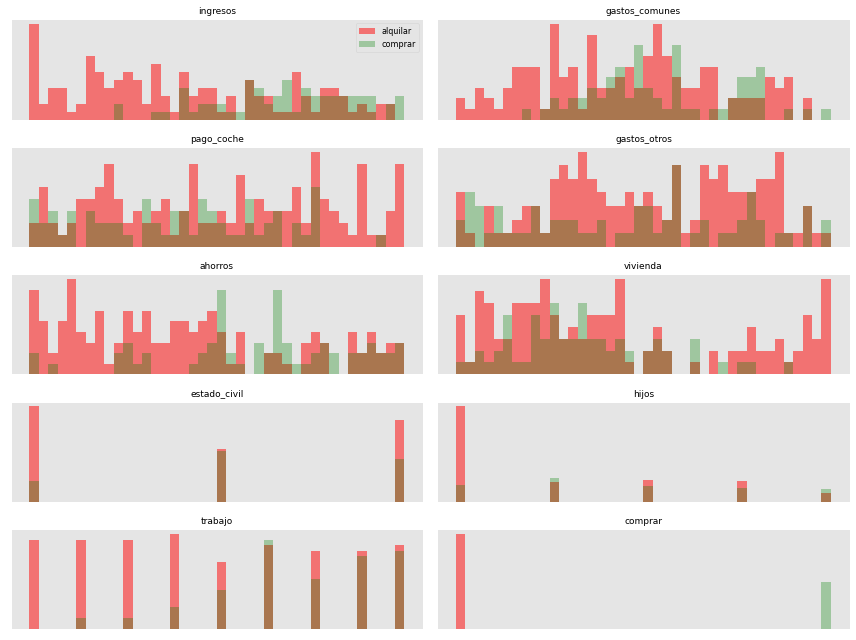

In [5]:
fig,axes =plt.subplots(5,2, figsize=(12, 9)) # 2 columnas cada una con 5 figuras, total 10 features
alquilar=dataframe[dataframe['comprar']==0] # conviene alquilar casa
comprar=dataframe[dataframe['comprar']==1] # conviene comprar casa
ax=axes.ravel()
for i in range(len(dataframe.columns)):
  _,bins=np.histogram(dataframe[dataframe.columns[i]],bins=40)
  ax[i].hist(alquilar.values[:,i],bins=bins,color='r',alpha=.5)# rojo alquilar
  ax[i].hist(comprar.values[:,i],bins=bins,color='g',alpha=0.3)# verde para comprar
  ax[i].set_title(dataframe.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
ax[0].legend(['alquilar','comprar'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [6]:
df = dataframe.drop(['comprar'], axis=1)

scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [8]:
pca = PCA(n_components=9)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

### Veamos cuántos buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [12]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma 5', np.sum(expl[0:5]))
print('suma acumulada', np.cumsum(expl))

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma 5 0.8524062117714309
suma acumulada [0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

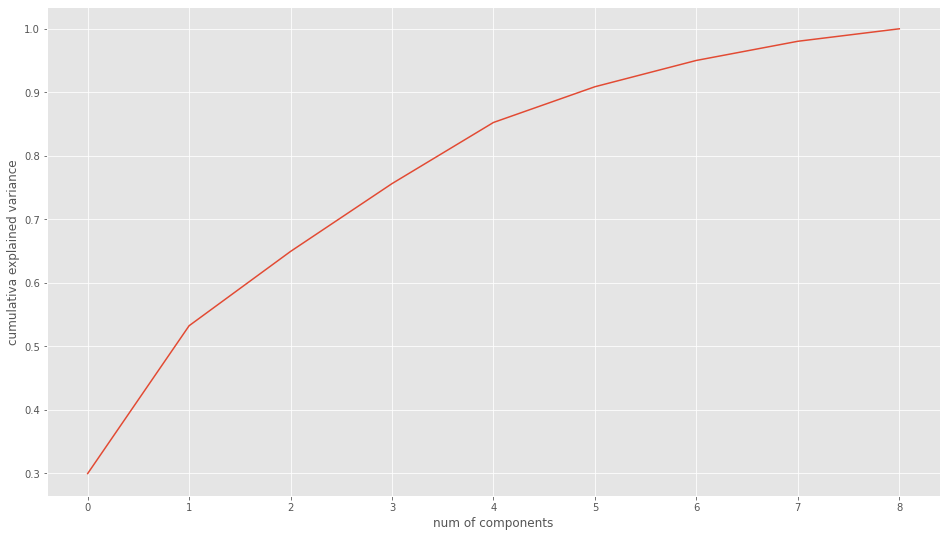

In [13]:
plt.plot(np.cumsum(expl))
plt.xlabel('num of components')
plt.ylabel('cumulativa explained variance');

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

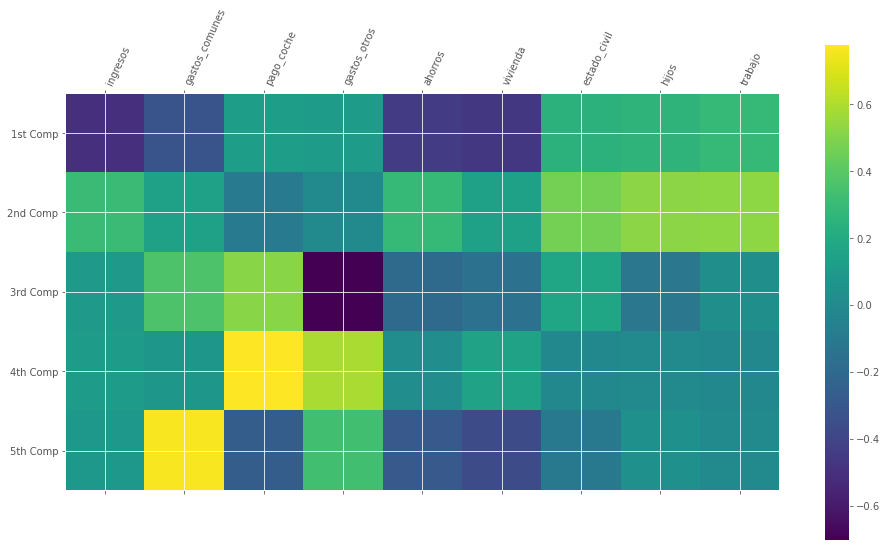

In [14]:
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?

In [15]:
X = dataframe.drop('comprar', 1)
y = dataframe['comprar']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [16]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipe.fit(X_train, y_train)

pipe.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [18]:
print('Accuracy', pipe.score(X_test, y_test))

Accuracy 0.7560975609756098


In [20]:
confusion_matrix(pipe.predict(X_test), y_test)

array([[21,  7],
       [ 3, 10]], dtype=int64)

In [21]:
params = {
    "pca__n_components": list(range(1,10)),
    "knn__n_neighbors": list(range(1,10))
}

# Gridsearch
gsearch = GridSearchCV(pipe,
                      params,
                      cv=10)

gsearch.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [22]:
estimator = gsearch.best_estimator_
print(estimator)
print(gsearch.best_params_)

print("Accuracy train:", estimator.score(X_train, y_train))
print("Accuracy test:", estimator.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('knn', KNeighborsClassifier(n_neighbors=7))])
{'knn__n_neighbors': 7, 'pca__n_components': 8}
Accuracy train: 0.906832298136646
Accuracy test: 0.8048780487804879
